In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from yellowbrick.classifier import ClassificationReport

dataset = pd.read_csv('dataset.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3079 entries, 0 to 3078
Data columns (total 88 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3079 non-null   int64  
 1   Flow_ID            3079 non-null   object 
 2   Src_IP             3079 non-null   object 
 3   Src_Port           3079 non-null   int64  
 4   Dst_IP             3079 non-null   object 
 5   Dst_Port           3079 non-null   int64  
 6   Protocol           3079 non-null   int64  
 7   Timestamp          3079 non-null   object 
 8   Flow_Duration      3079 non-null   int64  
 9   Tot_Fwd_Pkts       3079 non-null   int64  
 10  Tot_Bwd_Pkts       3079 non-null   int64  
 11  TotLen_Fwd_Pkts    3079 non-null   int64  
 12  TotLen_Bwd_Pkts    3079 non-null   int64  
 13  Fwd_Pkt_Len_Max    3079 non-null   int64  
 14  Fwd_Pkt_Len_Min    3079 non-null   int64  
 15  Fwd_Pkt_Len_Mean   3079 non-null   float64
 16  Fwd_Pkt_Len_Std    3079 

In [4]:
#convert to number
dataset.Sub_Cat[dataset.Sub_Cat == 'Normal'] = 0
dataset.Sub_Cat[dataset.Sub_Cat == 'Mirai-Hostbruteforceg'] = 1
dataset.Sub_Cat[dataset.Sub_Cat == 'Mirai-Ackflooding'] = 2
dataset.Sub_Cat[dataset.Sub_Cat == 'Mirai-UDP Flooding'] = 3
dataset.Sub_Cat[dataset.Sub_Cat == 'Mirai-HTTP Flooding'] = 4
dataset.Sub_Cat[dataset.Sub_Cat == 'Scan Port OS'] = 5
dataset.Sub_Cat[dataset.Sub_Cat == 'Scan Hostport'] = 6
dataset.Sub_Cat[dataset.Sub_Cat == 'DoS-Synflooding'] = 7
dataset.Sub_Cat[dataset.Sub_Cat == 'MITM ARP Spoofing'] = 8

c:\users\mhadi\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\mhadi\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\mhadi\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [5]:
#train y
y = dataset[['Sub_Cat']]
y = y.values
y = y.astype('int')
len(y)

3079

In [6]:
#train x
cols_drop = ['Flow_ID', 'Src_IP', 'Dst_IP', 'Timestamp', 'Label', 'Cat', 'Sub_Cat','Device']
X = dataset.drop(cols_drop, axis=1)
X = X.dropna()
X = X.iloc[:]
len(X)

3079

In [7]:
#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.70)

In [8]:
#preprocessing
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
#build model dan klasifikasi
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 40)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = rf.score(X_test, y_test)
rf_acc

c:\users\mhadi\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.673469387755102

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rf_pred)
cm

array([[121,  16,   0,   0,   0,   3,   0,   0,   0],
       [ 13, 715,   2,   8,  11,  54,  25,   0,  18],
       [  4,  19,  24,  49,  30,   0,   0,   0,   0],
       [  2,  13,  30, 246,  34,   0,   0,   0,   0],
       [  3,  12,  37,  31,  34,   1,   0,   0,   0],
       [  7,  74,   0,   0,   0, 172,  46,   0,   0],
       [  4,  28,   0,   0,   0,  60,  36,   0,   0],
       [  5,   3,   0,   1,   0,   0,   0,  86,   0],
       [  0,  55,   1,   2,   0,   2,   1,   0,  18]], dtype=int64)

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_clf.score(X_test, y_test)


c:\users\mhadi\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8047309833024119

In [12]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf = KNeighborsClassifier(n_neighbors=3)
kn_clf.fit(X_train, y_train)
kn_pred = kn_clf.predict(X_test)
kn_clf.score(X_test, y_test)

c:\users\mhadi\appdata\local\programs\python\python36\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.62569573283859

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       140
           1       0.76      0.85      0.80       846
           2       0.26      0.19      0.22       126
           3       0.73      0.76      0.74       325
           4       0.31      0.29      0.30       118
           5       0.59      0.58      0.58       299
           6       0.33      0.28      0.31       128
           7       1.00      0.91      0.95        95
           8       0.50      0.23      0.31        79

    accuracy                           0.67      2156
   macro avg       0.58      0.55      0.56      2156
weighted avg       0.66      0.67      0.66      2156



In [14]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       140
           1       0.91      0.95      0.93       846
           2       0.31      0.32      0.31       126
           3       0.74      0.75      0.74       325
           4       0.34      0.30      0.32       118
           5       0.79      0.83      0.81       299
           6       0.74      0.49      0.59       128
           7       1.00      0.92      0.96        95
           8       0.93      0.96      0.94        79

    accuracy                           0.80      2156
   macro avg       0.75      0.72      0.73      2156
weighted avg       0.80      0.80      0.80      2156



c:\users\mhadi\appdata\local\programs\python\python36\lib\site-packages\yellowbrick\base.py:390: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y, **kwargs)


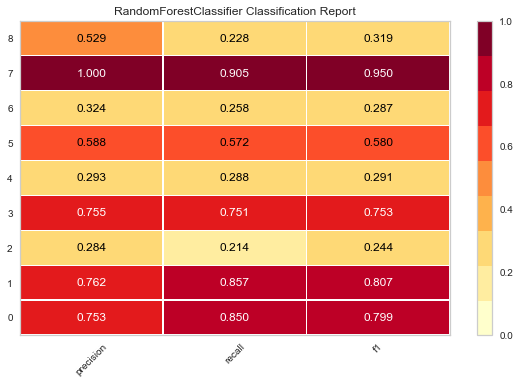

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [15]:
classes = ['precision', 'recall', 'f1-score', 'support']
visualizer = ClassificationReport(RandomForestClassifier())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

c:\users\mhadi\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


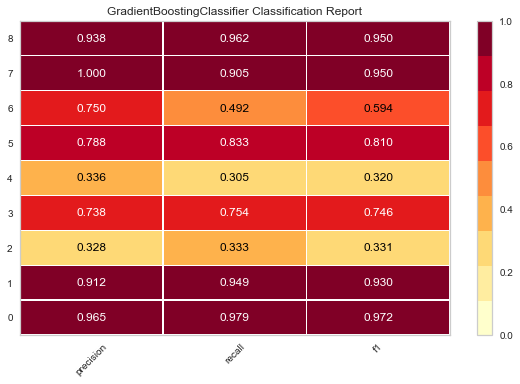

<AxesSubplot:title={'center':'GradientBoostingClassifier Classification Report'}>

In [16]:
visualizer = ClassificationReport(GradientBoostingClassifier())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

c:\users\mhadi\appdata\local\programs\python\python36\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


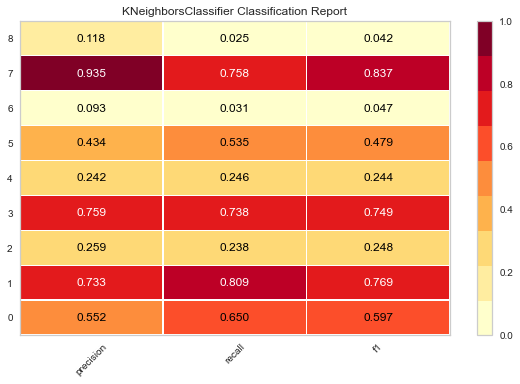

<AxesSubplot:title={'center':'KNeighborsClassifier Classification Report'}>

In [17]:
classes = ['precision', 'recall', 'f1-score', 'support']
visualizer = ClassificationReport(KNeighborsClassifier())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()